# Alternating Method of Multipliers- Theory and Industry Example Application

In this blog post we will solve the following optimization problem using the scaled form of alternating direction
method of multipliers (ADMM).

$$ min \frac{1}{2}\left \| Ax-b \right \|_{2}^{2} + \lambda_1\left \| x \right \|_1 + \frac{\lambda_2}{2}\left \| x \right \|_{2}^{2}min \frac{1}{2}\left \| Ax-b \right \|_{2}^{2} + \lambda_1\left \| x \right \|_1 + \frac{\lambda_2}{2}\left \| x \right \|_{2}^{2}$$

#### Background on ADMM

The alternating direction method of multipliers (ADMM) is an algorithm that solves convex optimization problems by breaking them into smaller pieces, each of which are then easier to handle. Namely, it is intended to blend the decomposability of dual ascent with the superior convergence properties of the method of multipliers. The original paper can be found here: https://stanford.edu/~boyd/papers/pdf/admm_distr_stats.pdf.

ADMM received lots of attention a few years ago due to the tremendous proliferation and subsequentdemand from large-scale and data-distributed machine learning applications. ADMM a fairly simple computational method for optimization proposed in 1970s. It stemmed from the augmented Lagrangian method (also known as the method of multipliers) dating back to late 1960s. The theoretical aspects of ADMM have been studied since the 1980s, and its global convergence was established in
the literature (Gabay, 1983; Glowinski & Tallec, 1989;Eckstein & Bertsekas, 1992). As reviewed in the comprehensive paper (Boyd et al., 2010), with the ability of dealing with objective functions separately and synchronously , ADMM turned out to be a natural fit in the field of large-scale data-distributed machine learning and big-data related optimization, and therefore received significant amount of attention beginning in 2015. Considerable work was conducted thereafter.

On the theoretical side, ADMM was shown to have an O(1/N) rate of convergence for convex problems.

The algorithm solves the problem in the form:
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; minimize $f(x) + g(z)$
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; subject to $Ax+ Bz = c$

with variables $x\in R^n$ and $z\in R^m$, where $A\in R^{pxn}$, $B\in R^{pxm}$ and $C\in R^{p}$.

The only difference from the general linear equality-constrained problem is that the variable x has been split into two parts, called x and z, with the objective function separable across this splitting. The optimal value of the problem is now denoted by:
$$ p^* = inf\left \{ f(x) + g(x) | Ax + Bz = c \right \} $$
Which forms the augmented Lagrangian:
$$ L_p(x, z, y) = f(x) + g(z) + y^T(Ax+Bz-c) + \frac{\rho}{2}\left \| Ax + Bz -c \right \|_{2}^{2} $$

Finally, we have our ADMM which consists of the following iterations:
$$ x^{k+1} = \underset{x}{argmin} L_\rho(x, z^k, y^k)$$
$$ z^{k+1} = \underset{x}{argmin} L_\rho(x^{k+1}, z, y^k) $$
$$ y^{k+1} = y^k + \rho(Ax^{k+1} +Bz^{k+1}-c) $$
$$s.t. \rho>0$$

The algorithm is very similar to dual ascent and the method of multipliers: it consists of an x-minimization step, a z-minimization step, and a dual variable update. As in the
method of multipliers, the dual variable update uses a step size equal to the augmented Lagrangian parameter. However, while with the method of multipliers the augmented Lagrangian is minimized jointly with respect to the two primal variables, in ADMM, on the other hand, x and z are updated in an alternating or sequential fashion, which accounts for the
term alternating direction.

Simple examples show that ADMM can be very slow to converge to high accuracy. However, it is often the case that ADMM converges to modest accuracy—sufficient for many applications—within a few tens of iterations. This behavior makes ADMM similar to algorithms likethe conjugate gradient method, for example, in that a few tens of iterations will often produce acceptable results of practical use. However, the slow convergence of ADMM also distinguishes it from algorithms such as Newton’s method (or, for constrained problems, interior-point methods), where high accuracy can be attained in a reasonable amount of time. While in some cases it is possible to combine ADMM with a method for producing a high accuracy solution from a low accuracy solution, in the general case ADMM will be practically useful mostly in cases when modest accuracy is sufficient. Fortunately, this is usually the case for large-scale industrial applications. Also, in the case of machine learning problems, solving a parameter estimation problem to very high accuracy often yields little to no improvement in actual prediction performance, the real metric of interest in applications.

#### Our Optimization Problem

First we will write the augmented Lagrangian function (the scaled form) and drive the ADMM updates.

Scaled form of the augmented Lagrangian

$$ L(x, z, u:\rho) = min\frac{1}{2}\left \| Ax-b \right \|_{2}^{2} + \lambda_{1}\left \| z \right \|_{1} + \frac{\lambda_{2}}{2}\left \| z \right \|_{2}^{2} + \frac{\rho}{2}\left \| x-z+ w \right \|_{2}^{2} + \frac{\rho}{2}\left \| w \right \|_{2}^{2} $$

$$ x_{k} = \underset{x}{argmin}\frac{1}{2}\left \| Ax-b \right \|_{2}^{2} + \frac{\rho}{2}\left \| x-z_{k-1}+ w_{k-1} \right \|_{2}^{2}  $$

$$ x_k = ((A^TA+\rho I))^{-1}(\rho(z_{k-1}-w_{k-1})+A^Tb) $$

$$ z_{k} = \underset{z}{argmin}  (\lambda_{1}\left \| z \right \|_{1} + \frac{\lambda_{2}}{2}\left \| z \right \|_{2}^{2}) + \frac{\rho}{2}\left \| x_{k}-z+ w_{k-1} \right \|_{2}^{2} $$

if $z>0$ $$ z_{k} = \frac{\rho(w_{k-1}+x_{k})}{\lambda_2-\rho}-\lambda_1$$

if $z<0$ $$ z_{k} = \frac{\rho(w_{k-1}+x_{k})}{\lambda_2-\rho}+\lambda_1$$

$$ w_{k} = w_{k-1} + x_k -z_k $$

#### Practical Application

Now, we will implement a regression algorithm using our augmented lagrangian. The dataset is the performance decay over time of a ship's Gas Turbine (GT) compressor. We split our test and train data 20:80.
The range of decay of compressor has been sampled with a uniform grid of precision 0.001 so to have a good granularity of representation. For the compressor decay state discretization the kMc coefficient has been investigated in the domain [0.95,1]. Ship speed has been investigated sampling the range of feasible speed from 3 knots to 27 knots with a granularity of representation equal to tree knots. A series of measures (13 features) which indirectly represents of the state of the system subject to performance decay has been acquired and stored in the dataset over the parameter’s space.

The A 13-feature vector containing the GT measures at steady state of the physical asset:
- Lever position (lp)
- Ship speed (v)
- Gas Turbine (GT) shaft torque (GTT)
- GT rate of revolutions (GTn)
- Gas Generator rate of revolutions (GGn)
- Port Propeller Torque (Tp)
- Hight Pressure (HP) Turbine exit temperature (T48)
- GT Compressor outlet air temperature (T2)
- HP Turbine exit pressure (P48)
- GT Compressor outlet air pressure (P2)
- GT exhaust gas pressure (Pexh)
- Turbine Injection Control (TIC)
- Fuel flow (mf)
- GT Compressor decay state coefficient

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat

In [172]:
ship_test = pd.read_csv("Shiptest-2.csv", header=None)
ship_train = pd.read_csv("Shiptrain-2.csv", header=None)

In [173]:
X_train = ship_train.iloc[:,:-1]
y_train = ship_train.iloc[:,-1:]
X_test = ship_test.iloc[:,:-1]
y_test = ship_test.iloc[:,-1:]

In [174]:
lambda_1 = 0.1
lambda_2 = 0.9

In [363]:
iterations = 100
rho = 0.1
w = 0
z = np.random.rand(13).reshape(-1,1)
A = X_train.values
b = y_train.values
loss = []
for i in range(iterations):
    x = (np.linalg.inv(np.dot(A.T,A) + (rho*np.eye(13)))).dot(rho*(z-w) + np.dot(A.T, b))
    for i in range(len(z)):
        if np.sign(z[i])>0:
            z = rho*(w+x)/(lambda_2-rho) - lambda_1
        else: 
            z = rho*(w+x)/(lambda_2-rho) + lambda_1
    w = w + rho*(x-z)
    loss.append(np.sum(0.5*(np.dot(A,x)-b)**2))

Text(0, 0.5, 'Obj')

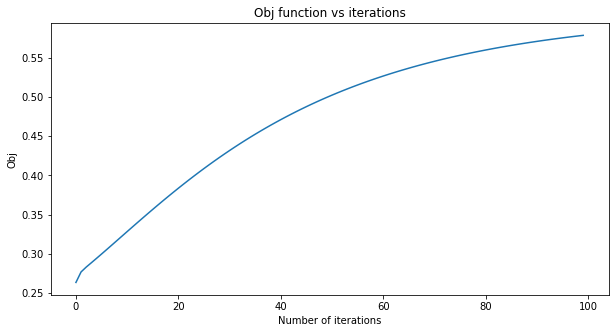

In [366]:
plt.figure(figsize=(10,5))
plt.plot(loss)
plt.title('Obj function vs iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Obj')

In [357]:
print("Coefficients")
x

Coefficients


array([[-5.05840315e-02],
       [ 1.03456745e-02],
       [ 1.21482112e-05],
       [-2.86479882e-04],
       [-1.49933306e-05],
       [-1.52302544e-03],
       [-9.13559793e-04],
       [ 1.36474482e-03],
       [ 1.85080531e-01],
       [ 5.00636758e-02],
       [ 6.72727845e-01],
       [-1.62063399e-04],
       [-1.76737055e-01]])

Sum absolute errors

In [376]:
abs_ms_errors = []
abs_errors = []
for A, b in zip(X_test.values, y_test.values):
    abs_ms_errors.append(abs(np.sum(0.5*(np.dot(A,x)-b)**2)))
    abs_errors.append(abs(np.sum(np.dot(A,x)-b)))
print("Sum absolute mean-squared errors:", round(sum(abs_ms_errors), 2))
print("Sum absolute errors:", round(sum(abs_errors), 2))

Sum absolute mean-squared errors: 0.14
Sum absolute errors: 21.1
